In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

In [83]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [28]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='qwerasdflar', api_key='VUXKSgHPhPw4FeP7b8rH')
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [84]:
df = pd.read_csv('train.csv')

df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['length'] = df['text'].apply(lambda x: len(str(x).split()))
df['num_unique'] = df['text'].apply(lambda x: len(set(str(x).split())))

df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopWords]))
df["num_punctuations"] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

df = df[df['length'] < 200] # delete sentences longer than 200 words

## Data Exploration and Preprocessing

In [85]:
df.head()

,id,text,author,polarity,length,num_unique,num_stopwords,num_punctuations,mean_word_len
0,id26305,"This process, however, afforded me no means of...",EAP,0.625000,41,35,19,7,4.658537
1,id17569,It never once occurred to me that the fumbling...,HPL,-0.500000,14,14,8,1,4.142857
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0.107407,36,32,16,5,4.583333
3,id27763,How lovely is spring As we looked from Windsor...,MWS,0.500000,34,32,13,4,5.088235
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,0.200000,27,25,11,4,5.481481


In [86]:
df.tail()

,id,text,author,polarity,length,num_unique,num_stopwords,num_punctuations,mean_word_len
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,0.000,20,19,11,3,4.450000
19575,id08973,The lids clenched themselves together as if in...,EAP,0.000,10,10,6,1,4.600000
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,0.000,13,13,4,2,4.307692
19577,id17513,"For an item of news like this, it strikes us i...",EAP,0.455,15,14,7,3,4.000000
19578,id00393,"He laid a gnarled claw on my shoulder, and it ...",HPL,0.000,22,21,14,2,4.000000


In [87]:
df_EAP = df[df['author'] == 'EAP']
df_HPL = df[df['author'] == 'HPL']
df_MWS = df[df['author'] == 'MWS']
# number of total sentences for each author
total_EAP = df_EAP.shape[0]
total_HPL = df_HPL.shape[0]
total_MWS = df_MWS.shape[0]

In [72]:
cnt_srs = df['author'].value_counts()
data = [go.Bar(x=cnt_srs.index,y=cnt_srs.values)]
py.iplot(data)

/Users/LAR/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



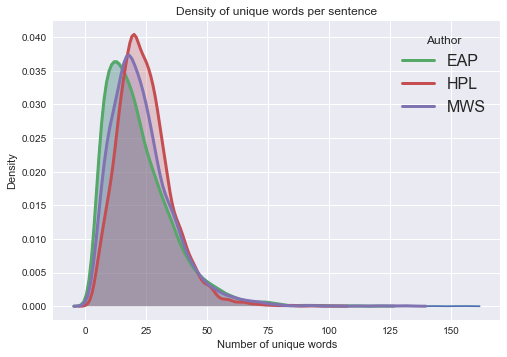

In [53]:
# plot length of sentence without repeated words
names = ['EAP','HPL', 'MWS']
for name in names:
    df_subset = df[df['author'] == name]
    sns.distplot(df_subset['num_unique'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = name)
plt.legend(prop={'size': 16}, title = 'Author')
plt.title('Density of unique words per sentence')
plt.xlabel('Number of unique words')
plt.ylabel('Density')
plt.show()

In [58]:
def plotBox(column_id):
    data = [{
        'x': df_EAP[column_id].values,
        #'y': np.repeat(['author'], len(df_EAP[column_id].values)),
        'name':'EAP',
        'marker': {'color': '#3D9970'},
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': df_HPL[column_id].values,
        #'y': np.repeat(['author'], len(df_HPL[column_id].values)),
        'name': 'HPL',
        'marker':{'color': '#FF4136',},
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': df_MWS[column_id].values,
        #'y': np.repeat(['author'], len(df_MWS[column_id].values)),
        'name':'MWS',
        'marker': {'color': '#FF851B',},
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }]
    layout = {'xaxis': {'title': column_id,'zeroline': False,},'boxmode': 'group',}
    fig = go.Figure(data=data, layout=layout)
    return (py.iplot(fig))

In [55]:
# plotting number of unique words per sentence in box chart
plotBox('num_unique')

In [59]:
# plotting length of sentence
plotBox('length')

In [60]:
# plotting polarity
plotBox('polarity')

## Data Preprocessing

In [135]:
from sklearn.model_selection import train_test_split
from scipy import sparse

In [181]:
X_train, X_test, y_train, y_test = train_test_split(df, df.author.values, test_size=0.1)
X_train_text = X_train.text.values
X_test_text = X_test.text.values
X_train_meta = X_train[['length','num_unique','num_stopwords','num_punctuations','mean_word_len']]
X_test_meta = X_test[['length','num_unique','num_stopwords','num_punctuations','mean_word_len']]

In [132]:

# customize tfidf vectorizer with stemming 
def tokenize(text):
    #translator = str.maketrans('', '', string.punctuation)
    #text = text.lower().translate(translator)
    stemmer = nltk.stem.porter.PorterStemmer()
    tokens = nltk.word_tokenize(text.translate(str.maketrans('', '', string.punctuation)))
    stems = [stemmer.stem(item) for item in tokens]
    return stems

In [186]:
tf_vect = TfidfVectorizer(tokenizer=tokenize, max_df=0.95, min_df=2, stop_words='english', decode_error='ignore')
corpus = pd.concat([X_train['text'],X_test['text']])
tf_vect.fit(corpus)
tf_train = tf_vect.transform(X_train_text)
tf_test = tf_vect.transform(X_test_text)

In [182]:
X_train_all = sparse.hstack([tf_train, sparse.csr_matrix(X_train_meta)]).tocsr()
X_test_all = sparse.hstack([tf_test, sparse.csr_matrix(X_test_meta)]).tocsr()

In [118]:
feature_names = tf_vect.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(x = x[0:30],y = y[0:30],marker= dict(colorscale='Earth',color = y[0:50]),text='Word counts')]
layout = go.Layout(title='Top 30 Word frequencies after Preprocessing')
fig = go.Figure(data,layout)
py.iplot(fig)

## LDA and Wordcloud

In [217]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation

In [266]:
df["text_cleaned"] = df["text"].apply(lambda x: [w for w in str(x).lower().split() if w not in stopWords])
df['text_c'] = df['text_cleaned'].apply(lambda x: " ".join(x))
eap = df[df.author=="EAP"]["text_c"].values
hpl = df[df.author=="HPL"]["text_c"].values
mws = df[df.author=="MWS"]["text_c"].values

In [275]:
def get_topics(model, feature_names, n_words):
    topics = []
    for index, topic in enumerate(model.components_):
        topics.extend(feature_names[i] for i in topic.argsort()[:-n_words - 1 :-1])
    return topics

In [298]:
def cloud(cleanText):
    n_words = 6 # top n words per topic
    tf_vect = TfidfVectorizer(tokenizer=tokenize, max_df=0.9, min_df=3, stop_words='english', decode_error='ignore')
    tf = tf_vect.fit_transform(cleanText)
    tf_feature_names = tf_vect.get_feature_names()
    lda = LatentDirichletAllocation(n_topics=11,max_iter=10,learning_method = 'online',
                                    learning_offset = 50,random_state = 0)
    lda.fit(tf)
    topics = get_topics(lda, tf_feature_names, n_words)
    wc = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(topics))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

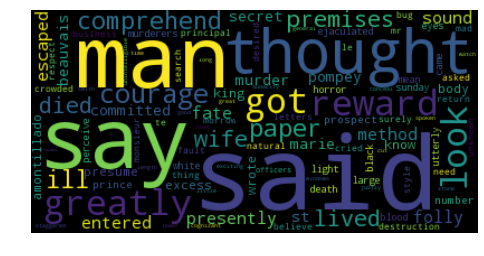

In [295]:
cloud(eap)

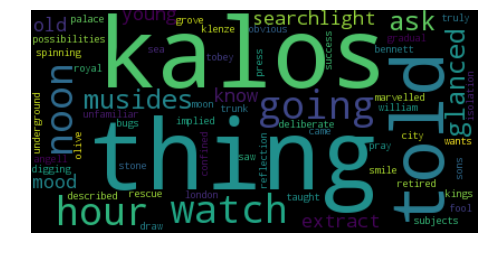

In [299]:
cloud(hpl)

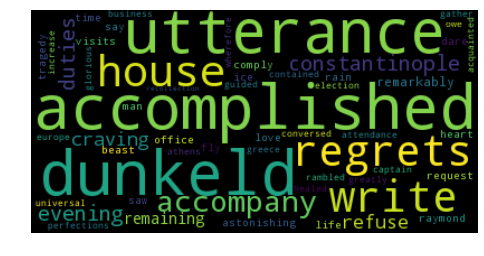

In [283]:
cloud(mws)

## Model

In [155]:
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
import itertools

In [169]:
def trainMNB(clf, X_train, y_train):
    cv_scores = []
    kfold = KFold(n_splits=3, shuffle=False, random_state=None)
    for train_indices, val_indices in kfold.split(X_train):
        train_X = X_train[train_indices]
        train_y = y_train[train_indices]
        val_X = X_train[val_indices]
        val_y = y_train[val_indices]
        clf.fit(train_X, train_y)
        pred_y = clf.predict_proba(val_X)
        cv_scores.append(log_loss(val_y, pred_y))
    
    print("Mean cv score : ", np.mean(cv_scores))
    return clf

In [196]:
clf = MultinomialNB()
clf = trainMNB(clf, tf_train, y_train)

Mean cv score :  0.6383960190836164


In [198]:
y_pred_labels = clf.predict(tf_test)
y_pred = clf.predict_proba(tf_test)
print("test score : ", log_loss(y_test, y_pred))

test score :  0.6391865232107861


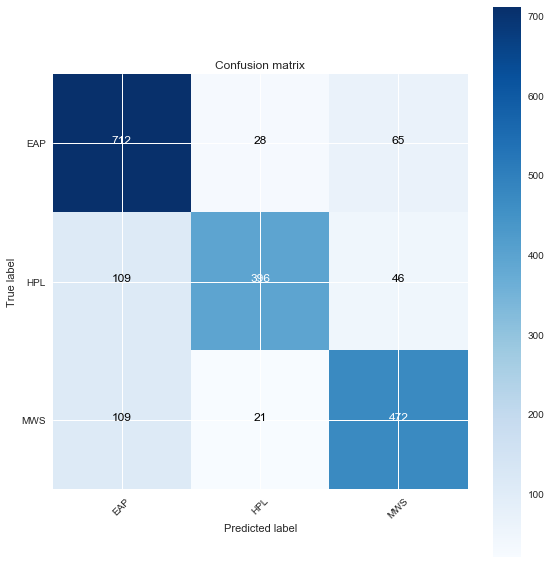

In [213]:
a, y_test_num = np.unique(y_test, return_inverse=True)

cnf_matrix = confusion_matrix(y_test_num, np.argmax(y_pred,axis=1))
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'])
plt.show()

In [194]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [301]:
tf_vect.vocabulary_ 

{'moment': 8755,
 'saw': 11886,
 'save': 11882,
 'myriad': 8969,
 'tiny': 13858,
 'dancing': 3245,
 'lights': 8005,
 'far': 5146,
 'enchain': 4528,
 'plague': 10144,
 'limits': 8022,
 'set': 12152,
 'term': 13643,
 'misery': 8689,
 'occasion': 9335,
 'courage': 2982,
 'forbearance': 5517,
 'forces': 5525,
 'bring': 1678,
 'great': 6105,
 'work': 15314,
 'moon': 8805,
 'went': 15088,
 'west': 15093,
 'tide': 13816,
 'sullen': 13259,
 'shore': 12276,
 'light': 7993,
 'old': 9400,
 'spires': 12801,
 'waves': 15024,
 'uncovered': 14303,
 'white': 15157,
 'columns': 2458,
 'gay': 5851,
 'green': 6115,
 'seaweed': 12039,
 'render': 11278,
 'little': 8065,
 'attentions': 950,
 'power': 10366,
 'final': 5331,
 'conclusion': 2624,
 'text': 13675,
 'represented': 11336,
 'artificial': 800,
 'alphabet': 448,
 'giving': 5939,
 'effect': 4357,
 'cipher': 2242,
 'usual': 14620,
 'methods': 8601,
 'solution': 12648,
 'furnish': 5746,
 'clue': 2376,
 'applied': 669,
 'basis': 1176,
 'tongue': 13906,
 

In [124]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import json
import requests
from requests.auth import HTTPBasicAuth

username = 'qwerasdflar' # Replace with YOUR USERNAME
api_key = 'VUXKSgHPhPw4FeP7b8rH' # Replace with YOUR API KEY

auth = HTTPBasicAuth(username, api_key)
headers = {'Plotly-Client-Platform': 'python'}

plotly.tools.set_credentials_file(username=username, api_key=api_key)
def get_pages(username, page_size):
    url = 'https://api.plot.ly/v2/folders/all?user='+username+'&page_size='+str(page_size)
    response = requests.get(url, auth=auth, headers=headers)
    if response.status_code != 200:
        return
    page = json.loads(response.content)
    yield page
    while True:
        resource = page['children']['next'] 
        if not resource:
            break
        response = requests.get(resource, auth=auth, headers=headers)
        if response.status_code != 200:
            break
        page = json.loads(response.content)
        yield page
        
def permanently_delete_files(username, page_size=500, filetype_to_delete='plot'):
    for page in get_pages(username, page_size):
        for x in range(0, len(page['children']['results'])):
            fid = page['children']['results'][x]['fid']
            res = requests.get('https://api.plot.ly/v2/files/' + fid, auth=auth, headers=headers)
            res.raise_for_status()
            if res.status_code == 200:
                json_res = json.loads(res.content)
                if json_res['filetype'] == filetype_to_delete:
                    # move to trash
                    requests.post('https://api.plot.ly/v2/files/'+fid+'/trash', auth=auth, headers=headers)
                    # permanently delete
                    requests.delete('https://api.plot.ly/v2/files/'+fid+'/permanent_delete', auth=auth, headers=headers)

permanently_delete_files(username, filetype_to_delete='plot')
permanently_delete_files(username, filetype_to_delete='grid')